In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.reset_option('display.max_rows')

In [2]:
rawdf = pd.read_csv(r"C:\DoPython\venv39\Personal_Project\Data_Quality\Original.csv")
rawdf.info()
rawdf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
# python is considering "____" as a value as you can see in occupation column.
rawdf.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


# Dropping unnecessary columns from the dataset

In [4]:
newdf1 = rawdf.drop(['ID','SSN', 'Type_of_Loan'], axis=1)
newdf1

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,-500,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,June,Nicks,25,Mechanic,39628.99,3359.415833,4,6,5729,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


# Checking total missing values in each column

In [5]:
newdf1.isna().sum()

Customer_ID                     0
Month                           0
Name                         9985
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

# Replacing certain values that were counted a values but did not make any sense hence replacing to NaN values

In [6]:
newdf1 = newdf1.replace('_______', pd.np.nan)  #Occupation

In [7]:
newdf1 = newdf1.replace('_', pd.np.nan)  #Credit_Mix

In [8]:
newdf1 = newdf1.replace('__10000__', pd.np.nan)  #Amount_invested_monthly

In [9]:
newdf1 = newdf1.replace('!@9#%8', pd.np.nan)  #Payment_Behaviour

In [10]:
newdf1 = newdf1.replace('__-333333333333333333333333333__', pd.np.nan)  #Monthly_Balance

In [11]:
newdf1.iloc[16]

Customer_ID                            CUS_0x2dbc
Month                                     January
Name                                       Langep
Age                                            34
Occupation                                    NaN
Annual_Income                           143162.64
Monthly_Inhand_Salary                    12187.22
Num_Bank_Accounts                               1
Num_Credit_Card                                 5
Interest_Rate                                   8
Num_of_Loan                                     3
Delay_from_due_date                             5
Num_of_Delayed_Payment                          8
Changed_Credit_Limit                          7.1
Num_Credit_Inquiries                          3.0
Credit_Mix                                   Good
Outstanding_Debt                          1303.01
Credit_Utilization_Ratio                28.616735
Credit_History_Age          17 Years and 9 Months
Payment_of_Min_Amount                          No


# Data Cleaning

In [12]:
# Group the DataFrame by the customer ID
groups = newdf1.groupby('Customer_ID')

In [13]:
# Fill missing values in the first and last rows of each group
newdf1['Name'] = groups['Name'].apply(lambda x: x.ffill().bfill())
newdf1['Occupation'] = groups['Occupation'].apply(lambda x: x.ffill().bfill())

In [14]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  object 
 6   Monthly_Inhand_Salary     84998 non-null   float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      97909 non-null   ob

In [15]:
newdf1

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,-500,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,June,Nicks,25,Mechanic,39628.99,3359.415833,4,6,5729,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [16]:
# calculate the mean salary for each "Customer_Id" group
mean_salaries_by_customer = newdf1.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform('mean')

In [17]:
# replace missing values with the mean salary for each "Customer_Id"
newdf1['Monthly_Inhand_Salary'] = newdf1['Monthly_Inhand_Salary'].fillna(mean_salaries_by_customer)

In [18]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  object 
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      97909 non-null   ob

In [19]:
# Function that removes underscores from the beginning or end of strings in Dataset
def strip_columns(df, columns):
    df[columns] = df[columns].apply(lambda x: x.str.strip('_'))
    return df

In [20]:
newdf1 = strip_columns(newdf1, ['Num_of_Delayed_Payment', 'Num_of_Loan', 'Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt'])

In [21]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  object 
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      97909 non-null   ob

In [22]:
# extract the years from strings in column 'A'
newdf1['Years'] = newdf1['Credit_History_Age'].str.extract('(\d+) Years', expand=False)

In [23]:
newdf1['Months'] = newdf1['Credit_History_Age'].str.extract('(\d+) Months', expand=False)

In [24]:
# compute the total months from 'Years' and 'Months'
newdf1['Total_Months'] = pd.to_numeric(newdf1['Years'], errors='coerce') * 12 + pd.to_numeric(newdf1['Months'], errors='coerce')

In [25]:
newdf1.head()

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Years,Months,Total_Months
0,CUS_0xd40,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,22,1,265.0
1,CUS_0xd40,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,NaN,NaN,NaN
2,CUS_0xd40,March,Aaron Maashoh,-500,Scientist,19114.12,1824.843333,3,4,3,...,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,22,3,267.0
3,CUS_0xd40,April,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,22,4,268.0
4,CUS_0xd40,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,22,5,269.0


In [26]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  object 
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      97909 non-null   ob

In [27]:
# Converting Data types for columns
newdf1[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']] = newdf1[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']].astype('float64')

In [28]:
mean_Num_of_Delayed_Payment_by_customer = newdf1.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform('mean')
mean_Changed_Credit_Limit_by_customer = newdf1.groupby('Customer_ID')['Changed_Credit_Limit'].transform('mean')
mean_Num_Credit_Inquiries_by_customer = newdf1.groupby('Customer_ID')['Num_Credit_Inquiries'].transform('mean')
mean_Amount_invested_monthly_by_customer = newdf1.groupby('Customer_ID')['Amount_invested_monthly'].transform('mean')
mean_Monthly_Balance_by_customer = newdf1.groupby('Customer_ID')['Monthly_Balance'].transform('mean')
mean_Total_Months_by_customer = newdf1.groupby('Customer_ID')['Total_Months'].transform('mean')

In [29]:
# replace missing values with the mean for each "Customer_Id"
newdf1['Num_of_Delayed_Payment'] = newdf1['Num_of_Delayed_Payment'].fillna(mean_Num_of_Delayed_Payment_by_customer)

In [30]:
newdf1['Changed_Credit_Limit'] = newdf1['Changed_Credit_Limit'].fillna(mean_Changed_Credit_Limit_by_customer)

In [31]:
newdf1['Num_Credit_Inquiries'] = newdf1['Num_Credit_Inquiries'].fillna(mean_Num_Credit_Inquiries_by_customer)

In [32]:
newdf1['Amount_invested_monthly'] = newdf1['Amount_invested_monthly'].fillna(mean_Amount_invested_monthly_by_customer)

In [33]:
newdf1['Monthly_Balance'] = newdf1['Monthly_Balance'].fillna(mean_Monthly_Balance_by_customer)

In [34]:
newdf1['Total_Months'] = newdf1['Total_Months'].fillna(mean_Total_Months_by_customer)

In [35]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  float64
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

In [36]:
mode_Credit_Mix = newdf1.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.mode()[0])
print("Mode of Credit_Mix =", mode_Credit_Mix)

Mode of Credit_Mix = Customer_ID
CUS_0x1000         Bad
CUS_0x1009    Standard
CUS_0x100b        Good
CUS_0x1011    Standard
CUS_0x1013        Good
                ...   
CUS_0xff3         Good
CUS_0xff4     Standard
CUS_0xff6         Good
CUS_0xffc          Bad
CUS_0xffd     Standard
Name: Credit_Mix, Length: 12500, dtype: object


In [37]:
# Replace missing values with mode
newdf1['Credit_Mix'] = newdf1.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.fillna(value=mode_Credit_Mix[x.name]))

In [38]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  float64
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

In [39]:
clean_df = newdf1.drop(['Month', 'Name', 'Age', 'Customer_ID', 'Years', 'Months', 'Credit_History_Age'], axis=1)

In [40]:
final_df = clean_df.dropna()

In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92400 entries, 0 to 99998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Occupation                92400 non-null  object 
 1   Annual_Income             92400 non-null  float64
 2   Monthly_Inhand_Salary     92400 non-null  float64
 3   Num_Bank_Accounts         92400 non-null  int64  
 4   Num_Credit_Card           92400 non-null  int64  
 5   Interest_Rate             92400 non-null  int64  
 6   Num_of_Loan               92400 non-null  float64
 7   Delay_from_due_date       92400 non-null  int64  
 8   Num_of_Delayed_Payment    92400 non-null  float64
 9   Changed_Credit_Limit      92400 non-null  float64
 10  Num_Credit_Inquiries      92400 non-null  float64
 11  Credit_Mix                92400 non-null  object 
 12  Outstanding_Debt          92400 non-null  float64
 13  Credit_Utilization_Ratio  92400 non-null  float64
 14  Paymen

# One hot encoding to categoeical columns

In [42]:
cols_OHE = final_df.filter(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'], axis=1)
cols_OHE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92400 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Occupation             92400 non-null  object
 1   Credit_Mix             92400 non-null  object
 2   Payment_of_Min_Amount  92400 non-null  object
 3   Payment_Behaviour      92400 non-null  object
dtypes: object(4)
memory usage: 3.5+ MB


In [43]:
cols_OHE = pd.get_dummies(cols_OHE)
cols_OHE.info()
cols_OHE.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92400 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   Occupation_Accountant                               92400 non-null  uint8
 1   Occupation_Architect                                92400 non-null  uint8
 2   Occupation_Developer                                92400 non-null  uint8
 3   Occupation_Doctor                                   92400 non-null  uint8
 4   Occupation_Engineer                                 92400 non-null  uint8
 5   Occupation_Entrepreneur                             92400 non-null  uint8
 6   Occupation_Journalist                               92400 non-null  uint8
 7   Occupation_Lawyer                                   92400 non-null  uint8
 8   Occupation_Manager                                  92400 non-null  uint8
 9   Occupation_Mechan

,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,...,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [44]:
Nocols_OHE = final_df.drop(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'], axis=1)
Nocols_OHE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92400 entries, 0 to 99998
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             92400 non-null  float64
 1   Monthly_Inhand_Salary     92400 non-null  float64
 2   Num_Bank_Accounts         92400 non-null  int64  
 3   Num_Credit_Card           92400 non-null  int64  
 4   Interest_Rate             92400 non-null  int64  
 5   Num_of_Loan               92400 non-null  float64
 6   Delay_from_due_date       92400 non-null  int64  
 7   Num_of_Delayed_Payment    92400 non-null  float64
 8   Changed_Credit_Limit      92400 non-null  float64
 9   Num_Credit_Inquiries      92400 non-null  float64
 10  Outstanding_Debt          92400 non-null  float64
 11  Credit_Utilization_Ratio  92400 non-null  float64
 12  Total_EMI_per_month       92400 non-null  float64
 13  Amount_invested_monthly   92400 non-null  float64
 14  Monthl

In [45]:
Nocols_OHE['Credit_Score'] = Nocols_OHE['Credit_Score'].replace(['Good','Standard', 'Poor'],['0','1', '2'])
Nocols_OHE['Credit_Score'] = Nocols_OHE['Credit_Score'].astype('int64')

# Identifing the percentage of outliers in each column

In [46]:
# Define a function to detect outliers in a column using IQR method
def detect_outliers(col):
    q1, q3 = col.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    return outliers

In [47]:
# Apply the outlier detection function to each column of the dataframe
outliers = Nocols_OHE.apply(detect_outliers)

In [48]:
# Calculate the percentage of outliers in each column
percent_outliers = (outliers.count() / Nocols_OHE.count()) * 100
print(percent_outliers)

Annual_Income               2.751082
Monthly_Inhand_Salary       2.001082
Num_Bank_Accounts           1.311688
Num_Credit_Card             2.269481
Interest_Rate               2.034632
Num_of_Loan                 4.339827
Delay_from_due_date         4.041126
Num_of_Delayed_Payment      1.074675
Changed_Credit_Limit        0.700216
Num_Credit_Inquiries        1.846320
Outstanding_Debt            5.257576
Credit_Utilization_Ratio    0.004329
Total_EMI_per_month         6.778139
Amount_invested_monthly     7.935065
Monthly_Balance             7.614719
Credit_Score                0.000000
Total_Months                0.000000
dtype: float64


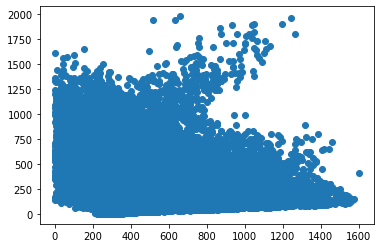

In [49]:
plt.scatter(y=Nocols_OHE['Amount_invested_monthly'], x=Nocols_OHE['Monthly_Balance'])

# Data Visualization and Modeling

In [50]:
merged_data = Nocols_OHE.join(cols_OHE)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92400 entries, 0 to 99998
Data columns (total 44 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Annual_Income                                       92400 non-null  float64
 1   Monthly_Inhand_Salary                               92400 non-null  float64
 2   Num_Bank_Accounts                                   92400 non-null  int64  
 3   Num_Credit_Card                                     92400 non-null  int64  
 4   Interest_Rate                                       92400 non-null  int64  
 5   Num_of_Loan                                         92400 non-null  float64
 6   Delay_from_due_date                                 92400 non-null  int64  
 7   Num_of_Delayed_Payment                              92400 non-null  float64
 8   Changed_Credit_Limit                                92400 non-null  float64


<AxesSubplot:>

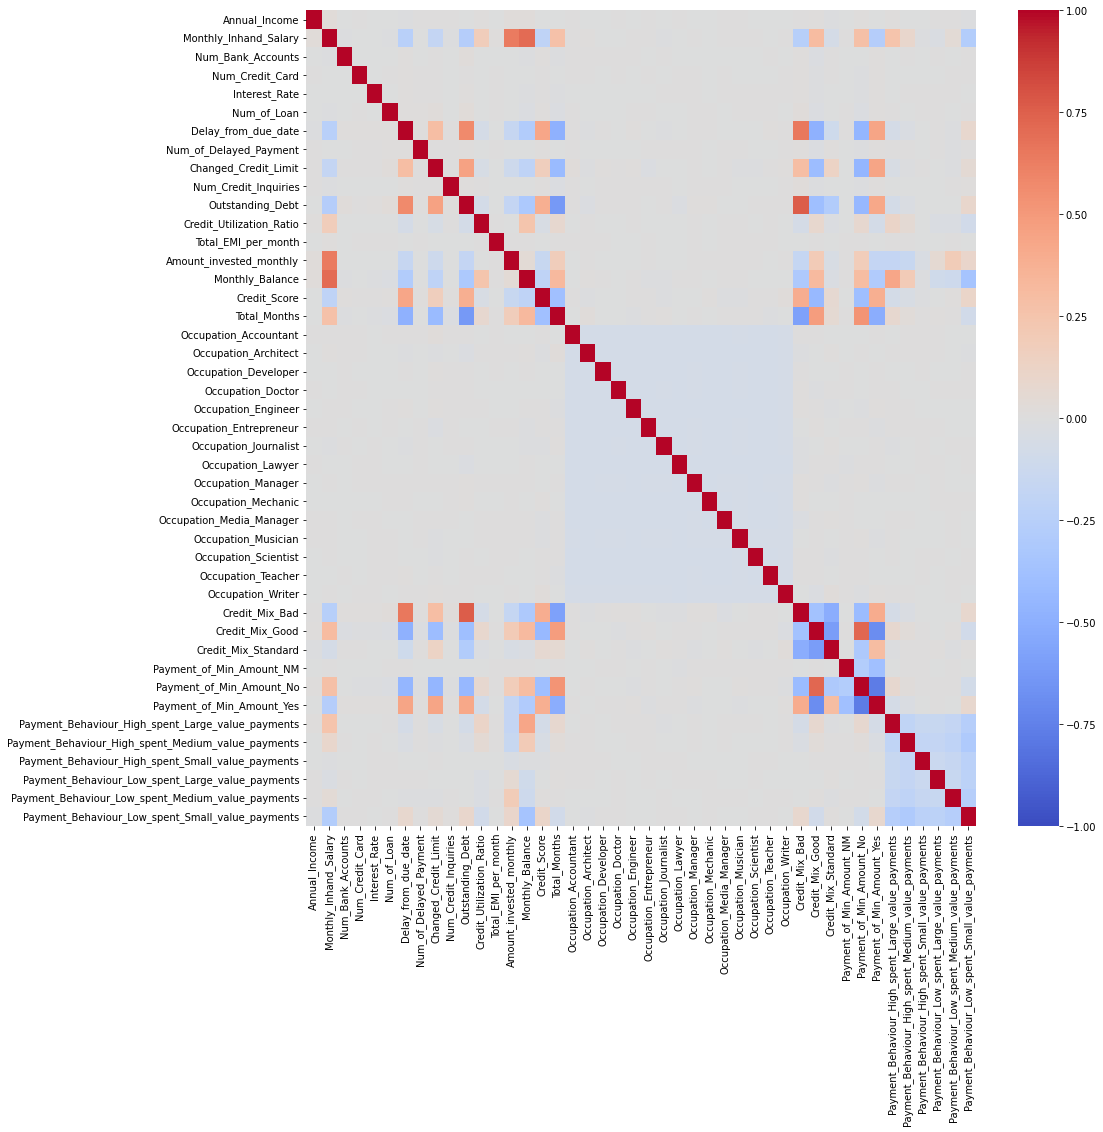

In [51]:
plt.figure(figsize=(15, 15))
sns.heatmap(merged_data.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

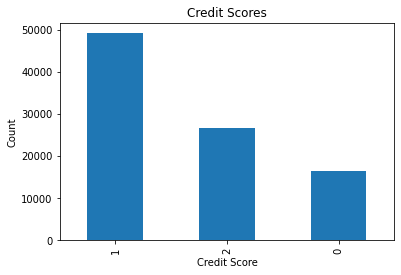

In [52]:
# Create a bar graph of the "Credit_Score" column
merged_data['Credit_Score'].value_counts().plot(kind='bar')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Credit Scores')

# Display the bar graph
plt.show()

In [66]:
from sklearn.cluster import KMeans

# Identify outliers using K-means
kmeans = KMeans(n_clusters=2)
kmeans.fit(merged_data)
merged_data['cluster'] = kmeans.labels_
merged_data['cluster'].value_counts()

0    91749
1      651
Name: cluster, dtype: int64

In [67]:
outliers = pd.DataFrame(merged_data[merged_data['cluster'] != merged_data['cluster'].mode()[0]])
outliers

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,cluster
361,18334118.0,4369.482500,10,10,18,8.0,30,18.000000,20.99,11.0,...,0,0,1,0,0,1,0,0,0,1
368,19717385.0,1057.435833,7,10,33,9.0,59,24.285714,8.82,11.0,...,0,0,1,0,0,1,0,0,0,1
564,19257912.0,11809.560000,0,3,7,2.0,14,7.000000,6.08,1.0,...,0,1,0,0,0,0,0,0,1,1
602,22335783.0,3580.457500,10,7,30,6.0,36,17.000000,8.47,10.0,...,0,0,1,0,0,0,0,0,1,1
617,16367214.0,10795.632500,1,3,1,4.0,9,7.000000,4.54,0.0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99280,18721299.0,7222.190000,4,7,10,2.0,6,7.000000,10.75,4.0,...,0,1,0,0,0,0,0,0,1,1
99714,11712577.0,2799.830833,5,6,8,4.0,10,11.000000,9.92,0.0,...,0,1,0,0,0,0,0,0,1,1
99721,8544730.0,3198.161667,5,4,5,3.0,9,6.000000,3.98,2.0,...,0,1,0,0,1,0,0,0,0,1
99882,16884797.0,5440.945000,7,3,1947,0.0,7,8.000000,12.57,2.0,...,0,0,1,0,0,1,0,0,0,1


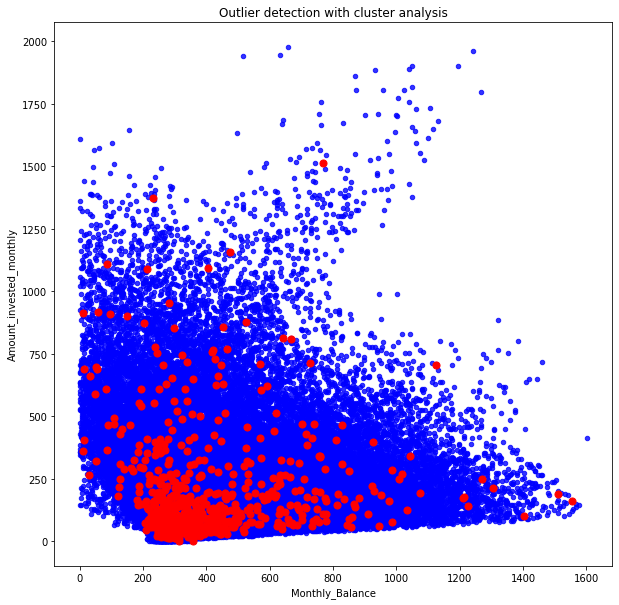

In [68]:
# Create a scatter plot of the input data
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(merged_data['Monthly_Balance'], merged_data['Amount_invested_monthly'], c='blue', s=20, alpha=0.8)

# Highlight the outliers in red
ax.scatter(outliers['Monthly_Balance'], outliers['Amount_invested_monthly'], c='red', s=50)

# Set labels and title
ax.set_xlabel('Monthly_Balance')
ax.set_ylabel('Amount_invested_monthly')
ax.set_title('Outlier detection with cluster analysis')

# Show the plot
plt.show()

In [56]:
# Reason for not performing percentage of outlier in each column on merged data is because of one hot encoding columns
# This method will always consider the minority class as an outlier and doing this will not train our model properly
# Hence we performed this step only on coulmns that did not require OHE

In [57]:
X = merged_data.drop(['Credit_Score'], axis=1)
y = merged_data['Credit_Score']

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

In [59]:
print(X_scaled_data)

[[-0.10991918 -0.74455803 -0.11998692 ... -0.42010185 -0.61760372
  -0.08566078]
 [-0.10991918 -0.74455803 -0.11998692 ... -0.42010185 -0.61760372
  -0.08566078]
 [-0.10991918 -0.74455803 -0.11998692 ...  2.38037512 -0.61760372
  -0.08566078]
 ...
 [-0.09561482 -0.26331033 -0.11146413 ... -0.42010185 -0.61760372
  -0.08566078]
 [-0.09561482 -0.26331033 -0.11146413 ... -0.42010185 -0.61760372
  -0.08566078]
 [-0.09561482 -0.26331033 -0.11146413 ... -0.42010185 -0.61760372
  -0.08566078]]


In [60]:
from sklearn.model_selection import train_test_split
X_scaled_data_train, X_scaled_data_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

In [62]:
clf.fit(X_scaled_data_test, y_test)

GradientBoostingClassifier()

In [63]:
y_pred = clf.predict(X_scaled_data_test)
y_pred

array([2, 1, 2, ..., 1, 2, 1], dtype=int64)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67      3304
           1       0.77      0.78      0.78      9804
           2       0.76      0.67      0.72      5372

    accuracy                           0.74     18480
   macro avg       0.72      0.73      0.72     18480
weighted avg       0.74      0.74      0.74     18480



In [65]:
sns.pairplot(final_df, hue='Credit_Score', height=4); 